## R Functions ##

Functions are the basic building blocks of programming. It allows us to avoid having to code the same thing over and over again, and make our code re usable and easier to manage when creating larger programs.

Here is a basic function that adds two numbers together so that we can see how they are structred in R:

In [1]:
add_num <- function(x, y) {
        x + y
}

In [2]:
add_num(5,6)

[1] 11

In [3]:
add_num(251,822)

[1] 1073

We define the name of the function, just like any variable, but the inside changes. We first tell R we are assigning a `function` and immediately we add in brackets the variables that the function takes, in this case `x` and `y` as placeholders for any number. The curly brakets is where we add what we want the function to actually do, in this case, add `x` and `y` together. We could add the `return` command before the instructions, but R will automatically return the last piece of the code from our function. Then we test it, and as we can any two numbers and our function will add them and return them.

Now let's code a function that will take a vector, and return the values that are above a certain value (10 in this case).

In [4]:
above_10 <- function(x) {
        use <- x > 10
        x[use]
}

In [10]:
vec <- 1:50
print(above_10(vec))

 [1] 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
[26] 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50


This only works for numbers above 10, what if we wanted to define that number:

In [11]:
above <- function(x,n) {
        use <- x > n
        x[use]
}

In [12]:
print(above(vec, 27))

 [1] 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50


In both cases, we are creating a `use` variable, which is just a True False vector of that tells us which numbers on our inputed vector satisfy the condition bigger than `n`. Then we ask it to return the subset of numbers which comply with that True False vector.

As for more complex functions, let's say we have a matrix and we want to calculate the mean of each column.

In [13]:
columnmean <- function(m) {
        nc <- ncol(m)
        means <- numeric(nc)
        for(i in 1:nc) {
                means[i] <- mean(m[, i])
        }
        means
}    

In [21]:
m1 <- matrix(rnorm(36)*100, nrow=6) # creating a random matrix of 36 numbers from -100 to 100 in 6 rows (hence 6 columns)

In [22]:
print(columnmean(m1))

[1] -75.730908 -21.827960  71.997776   1.108621  66.811140 -28.796938


Here we created a function that takes in a matrix `m`. We created the means vector to store the means, then iterated over the numer of columns, and stored the mean of each column in our means vector and at the end we ask it to return the `means` variable.

In general, functions belong to the class `function`, and we build them using the following structure:

```
f <- function(<arguments>) {
        ## Do Something interesting
}
```

Functions are `first class objects` which means they can be treated much like we do other objects in R. 

- Functions can be passed as arguments to other functions.
- Functions can be nested so that you can define a function within another function. The return  value of a function is the last expression in the function to be evaluated.

#### Function Arguments ####

Functions have named arguments which can potentially have default values.

- The formal arguments are the ones included in the function definition.
- The `formals` function returns a list of all the formal arguments of a function.

In [25]:
formals(add_num)

$x


$y



- Not every function call in R makes use of all the formal arguments.
- Function arguments can be missing or might have default values.

#### Argument Matching ####

R functions arguments can be matched positionally or by name. so the following calls to the function `sd` (standard deviation function), are all valid.

In [27]:
mydata <- rnorm(100) # 100 random numbers from -1 to 1

In [28]:
sd(mydata)

[1] 0.9105097

In [29]:
sd(x = mydata)

[1] 0.9105097

In [30]:
sd(x = mydata, na.rm = FALSE)

[1] 0.9105097

In [31]:
sd(na.rm = FALSE, x = mydata)

[1] 0.9105097

In [32]:
sd(na.rm = FALSE, mydata)

[1] 0.9105097

Even though it is legal, like in the last example, it is not recommended to play around with the order of the arguments.

We can also mix positional matching and matching by name. When an argument is matched by name it is taken 'taken out' of the argument list and the remaining unnamed arguments are matched in the order that they are listed in the function definition.

In [34]:
args(lm) # Linear model function

function (formula, data, subset, weights, na.action, method = "qr", 
    model = TRUE, x = FALSE, y = FALSE, qr = TRUE, singular.ok = TRUE, 
    contrasts = NULL, offset, ...) 
NULL

This means that the two following funciton calls are equivalent:

```
lm(data = mydata, y - x, model = FALSE, 1:100)
lm(y - x, mydata, 1:100, model = FALSE)
```

The second way to call the argument is the common and recommended one.

Most of the time, named arguments are useful when working directly on the command line, especially when you have a long argument list and we want to use the defaults except for a few arguments at the end of the list.

Named arguments also help if you can remember the name of the argument but not its position on the list.

Function arguments can also be partially matched, as long as there are no similar named arguments. This is very useful for interactive work. 

The order of the operations when given arguments is:

- Check for exact match for named argument
- Check for partial match
- Check for positional match



#### Defining Functions ####

When we define a function, we can decide which arguments, if any, will have default values and what the default value will be using the operator `=` when defining the arguments followed by the default value. Also, we can set up the default value as `NULL`.

```
f <- function(a, b = 1, c = 2, d = NULL) {
    
}
```

#### Lazy Evaluation ####

Arguments in functions are evaluated only as needed, meaning they will not be evaluated at all if not used. For example in this function:

In [4]:
f <- function(a, b) {
        
        a^2 ## Returns a to the power of 2
}

print(f(4))
print(f(4, 3))

[1] 16
[1] 16


In the above example, even though we have a 2 arguments, the function works by only passing the argument for `a` without generating an error, because it never has to use that argument. The function will accept a `b` argument but it is also irrelevant because since it is never used, it is never evaluated. This is what is called lay evaluation.

Here is an example to prove the lazy evaluation:

In [5]:
f <- function(a,b) {
    
        print(a)
        print(b)
}

f(45)

[1] 45


ERROR: Error in print(b): argument "b" is missing, with no default


This time we get an error, but only AFTER `a` is printed. Hence `b` was not checked to exist until it was actually needed by the program, and then the error of a missing variable in our code comes up.

#### The "..." Argument ####

The `...` argument in R indicates a variable number of arguments that will be usually passed to another argument. 

`...` is generally used when we want to extend another function but not copy the entire argunent list of the original function. Let's say we wanted to change the plot function so that instead of circles 

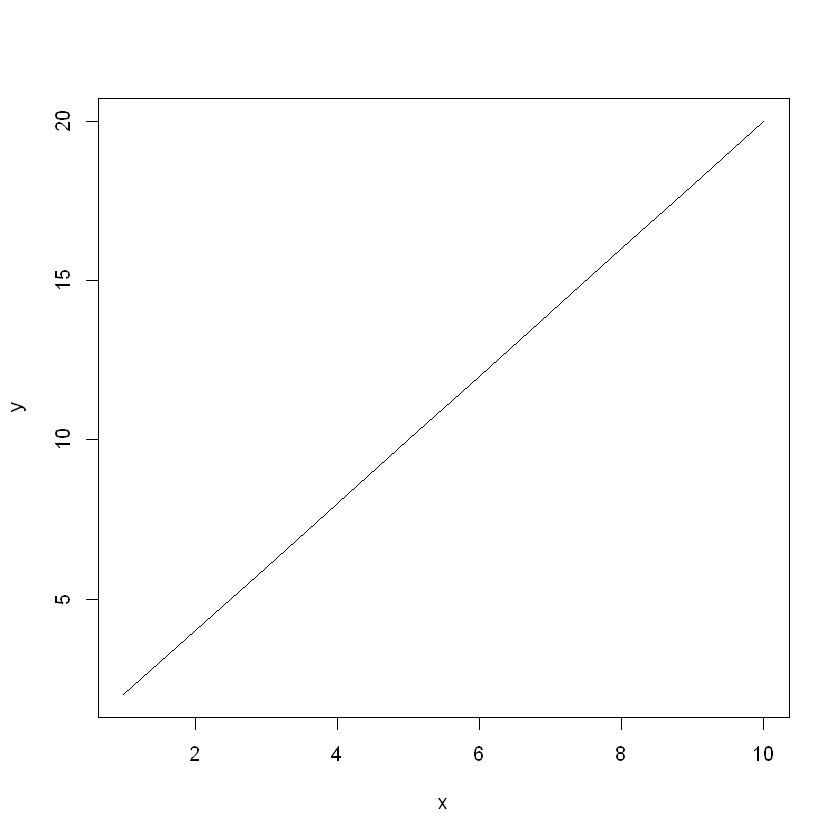

In [25]:
myplot <- function(x, y, type = 'l', ...){
    
        plot(x, y, type = type, ...)
}

myplot(1:10, 1:10 * 2)

In the above example, we are extending the use of `plot()` function by setting up lines as the default plot `type`, and we use the `...` argument to let our function know it will use the rest of the arguments from the original `plot()` function.

We also use the `...` argument when we do not know how many arguments will be eventually passed to a fucntion. For example the `paste()`, which concatenates a set of strings, but we do not know how many, function has the following arguments:

In [26]:
args(paste)

function (..., sep = " ", collapse = NULL) 
NULL

For example, lets pass just one argument to the function `past()`:

In [27]:
paste('hello')

[1] "hello"

Now let's pass 2 arguments:

In [28]:
paste('hello', 'world')

[1] "hello world"

And finally, let's do several:

In [29]:
paste('hello', 'world', 'I', 'am', 'learning', 'R')

[1] "hello world I am learning R"

Here we can see how the '...' argument simply says run this function on all of the argumentas passed.

There is only one catch with using the '...' argument, is that all arguments that come after `...` must be named arguments, since we do not know how many arguments will be passed in `...` we cannot used positional arguments.